# **Exploratory Data analysis**  

download the datset 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Open the discription

In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load data 

In [50]:
import pandas as pd
train = pd.read_csv('train.csv' , index_col = 0) # index_col make column # 0 is the index
test = pd.read_csv('test.csv' , index_col = 0)

## Exploring data

Here is your first look on the data. You need to get very general overview 

In [51]:
# train.columns # return colums names
# train.nunique(axis=0) # return number of unique elements in the object for each coloum
# train.describe() # retuen the calculation some statistical data like percentile, mean and std
# train.shape

In [52]:
# train.head() # return the fist 5 rows
# train.tail() # return the last 5 rows

In [53]:
train.info() # infomation about the coloums non-missing values and coloums data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

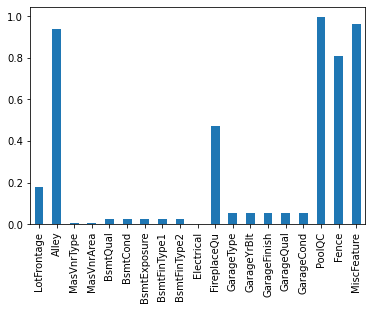

In [54]:
# count the number of missing values in each column
missing = train.isnull().sum()
missing = missing[missing > 0]/1460 # masking (filtering)
missing.plot.bar()
# Have a look in the discription
# Your findings ?

In [55]:
missing

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

## Modifying Data

We can modify the data by select row , select coloum , remove coloum , remove row , drop coloum

Select rows/ columns, drop a feature

Ref : https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/

https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/

### Data Selection

In [56]:
# iloc : Selecting data by row numbers
# single selection
train.iloc[0] # first row of data frame
train.iloc[:, 0] # first column of data frame

# Multiple selection
train.iloc[0:5] # first five rows of dataframe
train.iloc[:, 0:2] # first two columns of data frame with all rows
train.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
train.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).


,Alley,LotShape,LandContour
Id,,,
1,NaN,Reg,Lvl
2,NaN,Reg,Lvl
3,NaN,IR1,Lvl
4,NaN,IR1,Lvl
5,NaN,IR1,Lvl


In [57]:
# loc : Selecting data by label or by a conditional statement
# 1- By using the index (Note: you can change your index by set_index(Your_new_column_index))
# here the index is the id
train.loc[1]

# 2- Boolean / Logical indexing (condition)
train.loc[train['MSSubClass'] == 60]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,186500
1440,60,RL,80.0,11584,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,197000
1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000


### Data dropping

In [58]:
# Drop coloums
# single coloum
#train = train.drop(labels="MSSubClass", axis=1) # axis = 0 (rows) is the default
#train = train.drop("Alley", axis=1)
train = train.drop(columns="Street")

# Multi coloum
train = train.drop(labels=["LotFrontage", "LotArea"], axis=1)

In [59]:
# Drop rows
train = train.drop(labels=1, axis=0) # You can remove axis = 0 
train = train.drop(labels=[2,15,20], axis=0)
train = train.drop(labels=range(40, 45), axis=0)


## Data Types

We have to main types of data : Qualitative and Quantitative 

### Quantitvative Data 

In [60]:
# get the  quantitative features 
quantitative = [f for f in train.columns if train.dtypes[f] != 'object'] 

quantitative.remove('SalePrice')
#quantitative.remove ('Id')3

quantitative_data = train[quantitative]

#OR
# get the data with the quantitative features 
# numeric_features_data = train.select_dtypes(include=[np.number]) 
# numeric_features_data.columns

### Qualitative Data 

In [61]:
# get a list of qualitative features
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
qualitative_data = train[qualitative]

#OR 
# get the data with the qualitative features 
# categorical_features = train.select_dtypes(include=[np.object])
# categorical_features.columns

## Univariate visualization

### Output visulaization

<function matplotlib.pyplot.show(close=None, block=None)>

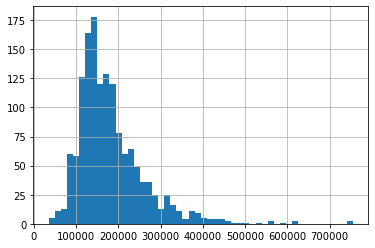

In [62]:
# in many cases, you would like to know if the output follows a normal distribution
# a simple way to visualize the distribution is histograms
y = train['SalePrice']
y.hist(bins=50)
plt.show

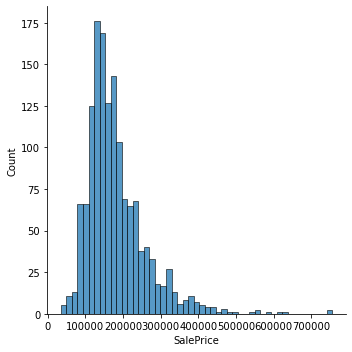

In [63]:
# another way is to use displot in seaborn
import seaborn as sns

ax= sns.displot(data=y, kde=False)

### Quantitative data visualization

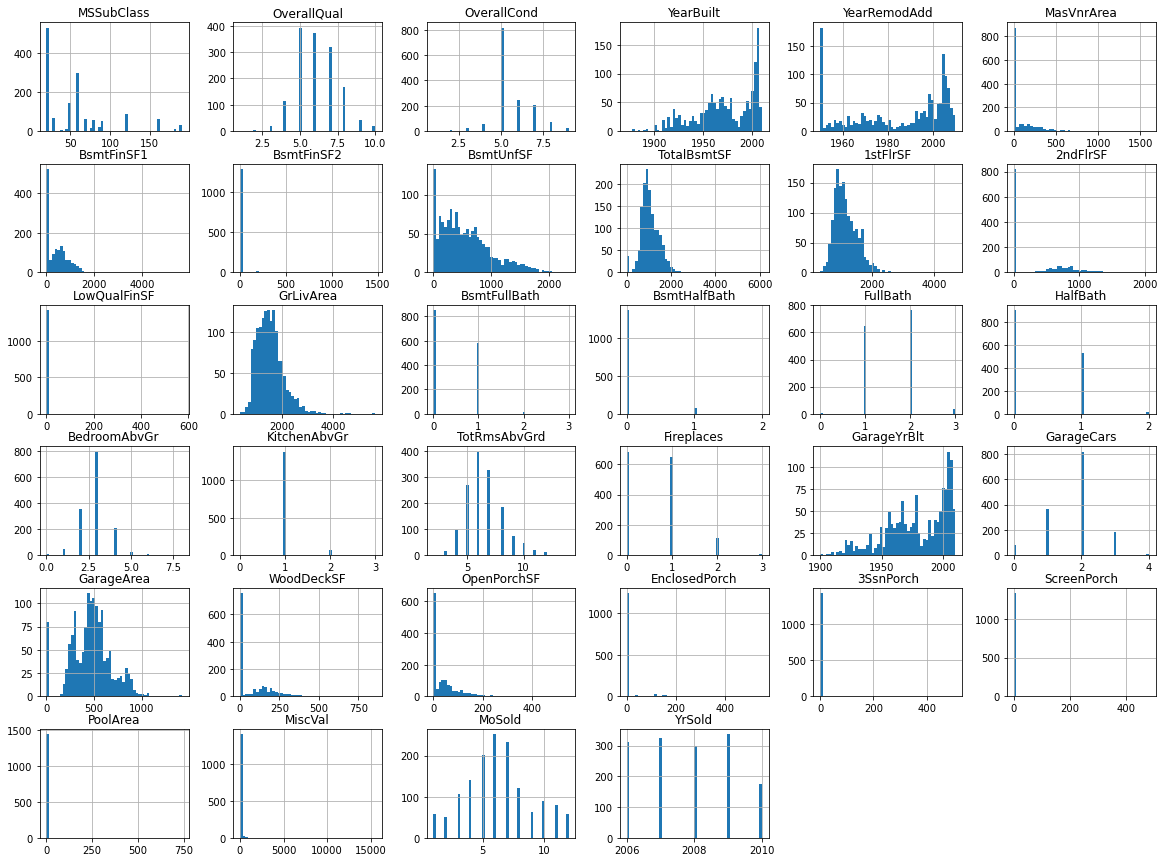

In [64]:
quantitative_data.hist(bins=50, figsize=(20,15))
plt.show()
# variance threshold

<AxesSubplot:>

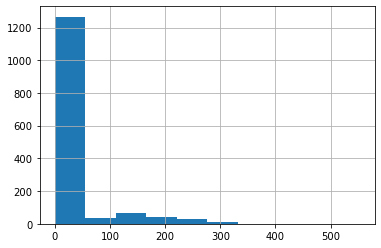

In [65]:
# Is there any thing interesting ? we need to zoom in!
quantitative_data['EnclosedPorch'].hist()

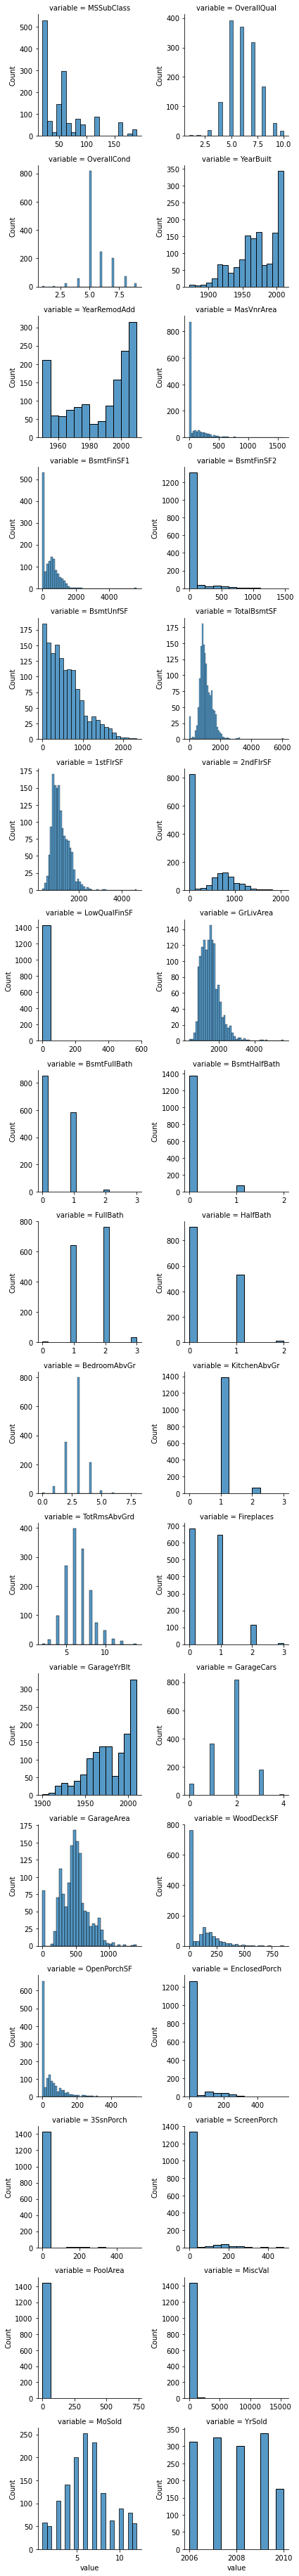

In [66]:
# We can display all the quatitative featues 
# create a dataframe using all quatitative feaures using melt and Facetgrid 
f = pd.melt(train, value_vars=quantitative) 
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False) # visualizing distribution of one variable
g = g.map(sns.histplot, "value")


In [67]:
# This kind of multi variant visulaization

quantitative_data = train[quantitative+['SalePrice']]
corr_matrix = quantitative_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790714
GrLivArea        0.708428
GarageCars       0.640182
GarageArea       0.622788
TotalBsmtSF      0.613592
1stFlrSF         0.606887
FullBath         0.561856
TotRmsAbvGrd     0.533441
YearBuilt        0.522928
YearRemodAdd     0.506500
GarageYrBlt      0.486220
MasVnrArea       0.477184
Fireplaces       0.467796
BsmtFinSF1       0.386923
WoodDeckSF       0.325003
2ndFlrSF         0.318106
OpenPorchSF      0.316818
HalfBath         0.283595
BsmtFullBath     0.227568
BsmtUnfSF        0.213271
BedroomAbvGr     0.167189
ScreenPorch      0.110976
PoolArea         0.092340
MoSold           0.047866
3SsnPorch        0.044369
BsmtFinSF2      -0.010540
BsmtHalfBath    -0.017197
MiscVal         -0.021405
LowQualFinSF    -0.025899
YrSold          -0.028991
OverallCond     -0.077917
MSSubClass      -0.084784
EnclosedPorch   -0.129227
KitchenAbvGr    -0.133498
Name: SalePrice, dtype: float64

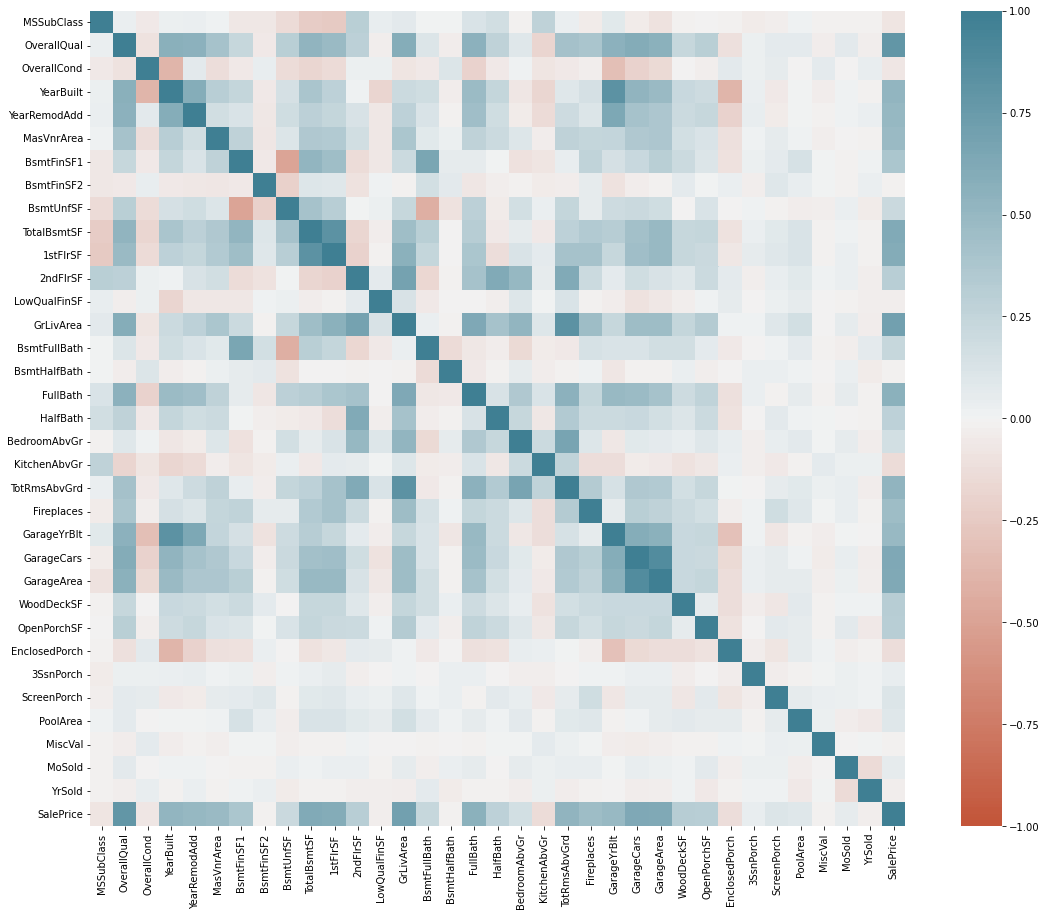

In [68]:
#Visualize correlation
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

### Qualitative data visualization

In [69]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories('MISSING')
        train[c] = train[c].fillna('MISSING')

In [70]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

/home/mg/miniconda3/envs/Data_analysis/lib/python3.6/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


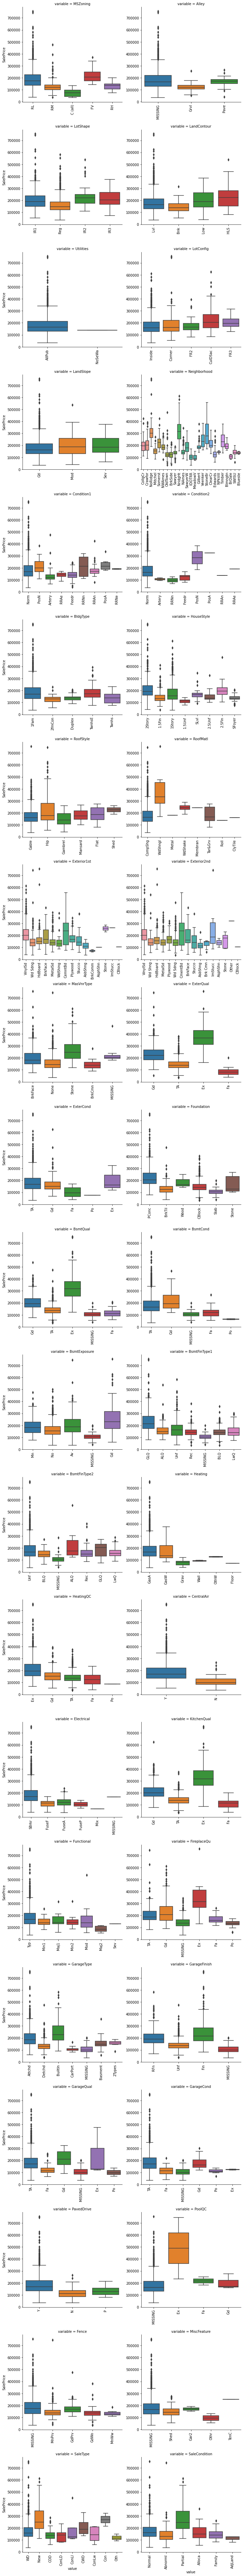

In [71]:
#create a box plot to show how the output changes with qualitative features
f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")